In [1]:
%run 1_Data_scraping_and_parsing.ipynb

C:\ProgramData\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Sentiment analysis

The NLTK (natural language toolkit) library will be used to perform sentiment analysis. Each headline is analyzed and given a score. The compound score ranges from -1 (highly negative sentiment) to 1 (highly positive sentiment). Two examples are given below.

In [2]:
sentiment = sia()

sentiment.polarity_scores('Cheesecake is my favorite dessert. It is sweet, creamy, and soft.')

{'compound': 0.7184, 'neg': 0.0, 'neu': 0.6, 'pos': 0.4}

In [3]:
sentiment.polarity_scores('I broke my leg in a skateboarding accident. The pain was almost unbearable.')

{'compound': -0.8481, 'neg': 0.535, 'neu': 0.465, 'pos': 0.0}

For our headlines, we loop through each week, first splitting them into distinct sentences with the spaCy library. Each sentence is then scored. If the score is greater than 0.1, we classify it as positive. If the score is less than -0.1, we classify it as negative. We record the proportion of positive and negative headlines as a tuple for each week. These tuples are then stored in a list.

In [4]:
headline_list = [None]

def open_headlines(w):
    try:
        f = open('data/week{}.txt'.format(w), 'r', encoding='utf-8')
        try:
            headline_list.append(f.read())  # adds the content of each text file to the end of the list
        finally:
            f.close()
    except IOError:
        pass

for i in range(1, 67):
    open_headlines(i)

In [5]:
sentiment_count = [None]

for i in range (1, 67):
    pos_headlines = 0
    neg_headlines = 0
    length = len(list(nlp(headline_list[i]).sents))
    for sent in nlp(headline_list[i]).sents:
        score = sentiment.polarity_scores(str(sent))
        if score['compound'] > 0.1:
            pos_headlines += 1/length
        if score['compound'] < -0.1:
            neg_headlines += 1/length
    sentiment_count.append((pos_headlines, neg_headlines))

Next, we extract the positive proportions and negative proportions and calculate the difference between the two.

In [6]:
pos = [sentiment_count[i][0] for i in range(1, 67)]
neg = [sentiment_count[i][1] for i in range(1, 67)]
diff = [pos[i] - neg[i] for i in range(66)]

Finally, we graph all three of these. The difference line shows that Politico's coverage was generally negative for the given time period.

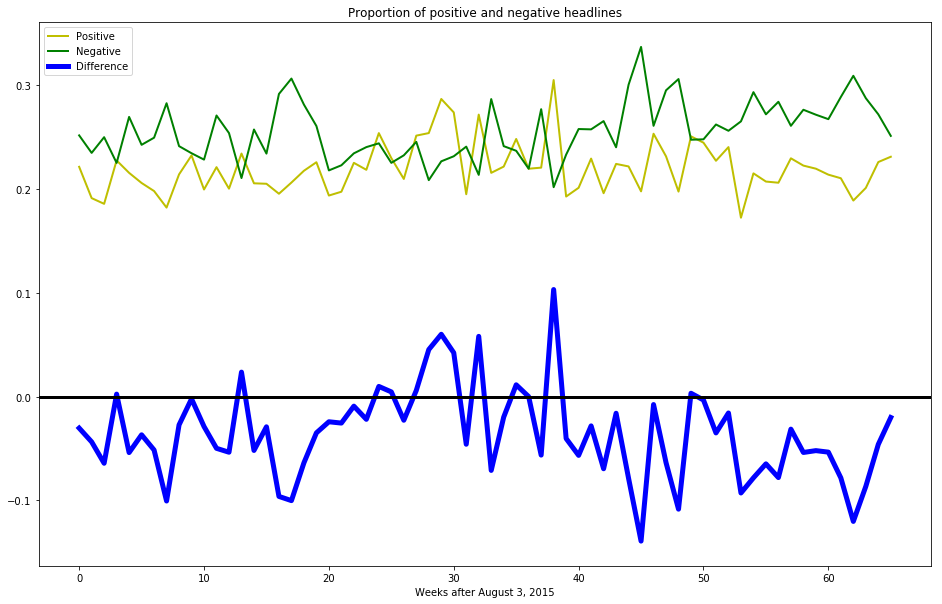

In [7]:
fig, axes = plt.subplots(1, 1, figsize=(16, 10))

axes.plot(pos, c='y', label='Positive', lw=2)
axes.plot(neg, c='green', label='Negative', lw=2)
axes.plot(diff, c='b', label='Difference', lw=5)
axes.axhline(y = 0, xmin=0, xmax=1, color='black', lw=3)
axes.legend(loc=2)
axes.set_xlabel('Weeks after August 3, 2015')
axes.set_title('Proportion of positive and negative headlines')